## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for thbat


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df_original = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")

In [10]:
df_original

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [11]:
df_original.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [15]:
df_original.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [12]:
categorical_columns = list(df_original.dtypes[df_original.dtypes == 'object'].index)
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [13]:
numerical_columns = list(df_original.dtypes[df_original.dtypes != 'object'].index)
numerical_columns.remove('converted')

numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [16]:
for c in categorical_columns:
    df_original[c] = df_original[c].fillna("NA")

df_original.isnull().sum()


for c in numerical_columns:
    df_original[c] = df_original[c].fillna(0)

df_original.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_original, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [25]:
from sklearn.metrics import roc_auc_score

for col in numerical_columns:
    a_s = roc_auc_score(y_train, df_train[col])

    if a_s < 0.5:
        a_s = roc_auc_score(y_train, -df_train[col])

    print(col, a_s)

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92


In [27]:
# Using scaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [29]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[categorical_columns].values)

ohe.get_feature_names_out()

array(['x0_NA', 'x0_events', 'x0_organic_search', 'x0_paid_ads',
       'x0_referral', 'x0_social_media', 'x1_NA', 'x1_education',
       'x1_finance', 'x1_healthcare', 'x1_manufacturing', 'x1_other',
       'x1_retail', 'x1_technology', 'x2_NA', 'x2_employed',
       'x2_self_employed', 'x2_student', 'x2_unemployed', 'x3_NA',
       'x3_africa', 'x3_asia', 'x3_australia', 'x3_europe',
       'x3_middle_east', 'x3_north_america', 'x3_south_america'],
      dtype=object)

In [58]:
X_train_num = df_train[numerical_columns]

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)
X_train_scaled = np.column_stack([X_train_num, X_train_cat])


In [59]:
model2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)

In [60]:
model2.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [61]:
X_val_num = df_val[numerical_columns].values
X_val_num = scaler.transform(X_val_num)


X_val_cat = ohe.transform(df_val[categorical_columns].values)

X_val_scaled = np.column_stack([X_val_num, X_val_cat])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
from sklearn.metrics import accuracy_score


y_pred = model2.predict_proba(X_val_scaled)[:, 1]
print(accuracy_score(y_val, y_pred >= 0.5))


roc_auc_score(y_val, y_pred)

0.8464163822525598


0.920956763493433

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745


In [69]:
t_list = np.arange(0.0, 1.01, 0.01)
t_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [70]:
scores = []
for t in t_list:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)


    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, fp, fn, tn))

In [73]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,171,122,0,0
1,0.01,171,116,0,6
2,0.02,171,110,0,12
3,0.03,170,108,1,14
4,0.04,170,103,1,19
...,...,...,...,...,...
96,0.96,66,1,105,121
97,0.97,61,0,110,122
98,0.98,51,0,120,122
99,0.99,39,0,132,122


In [77]:
df_scores['precision'] = df_scores['tp']/(df_scores['tp'] + df_scores['fp'])
df_scores

,threshold,tp,fp,fn,tn,precision
0,0.00,171,122,0,0,0.583618
1,0.01,171,116,0,6,0.595819
2,0.02,171,110,0,12,0.608541
3,0.03,170,108,1,14,0.611511
4,0.04,170,103,1,19,0.622711
...,...,...,...,...,...,...
96,0.96,66,1,105,121,0.985075
97,0.97,61,0,110,122,1.000000
98,0.98,51,0,120,122,1.000000
99,0.99,39,0,132,122,1.000000


In [79]:
df_scores['recall'] = df_scores.tp/ (df_scores.tp + df_scores.fn)
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,171,122,0,0,0.583618,1.000000
1,0.01,171,116,0,6,0.595819,1.000000
2,0.02,171,110,0,12,0.608541,1.000000
3,0.03,170,108,1,14,0.611511,0.994152
4,0.04,170,103,1,19,0.622711,0.994152
...,...,...,...,...,...,...,...
96,0.96,66,1,105,121,0.985075,0.385965
97,0.97,61,0,110,122,1.000000,0.356725
98,0.98,51,0,120,122,1.000000,0.298246
99,0.99,39,0,132,122,1.000000,0.228070


<Axes: xlabel='threshold', ylabel='precision'>

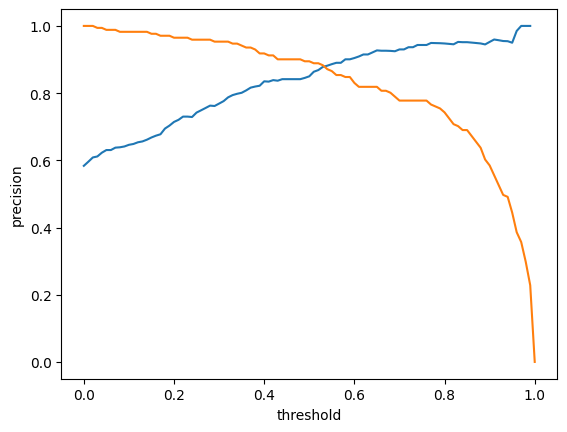

In [88]:
sns.lineplot(x = df_scores['threshold'], y = df_scores['precision'])
sns.lineplot(x = df_scores['threshold'], y = df_scores['recall'])

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [98]:
df_scores['f1'] = (2 * (df_scores.precision * df_scores.recall)) / (df_scores.precision + df_scores.recall)


In [99]:
id_max=df_scores.f1.idxmax()
id_max

53

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36m

In [105]:
!pip install tqdm



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [107]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm


In [131]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)
    
    return dv, model
    
def predict(df, dv, model):
    dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [132]:
n_splits = 5
std_list = []

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    std_list.append(np.std(scores))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.867 +- 0.029
C=0.01 0.831 +- 0.034
C=0.1 0.823 +- 0.035
C=0.5 0.822 +- 0.036
C=1 0.822 +- 0.036
C=5 0.822 +- 0.036
C=10 0.822 +- 0.036


In [133]:
np.mean(scores)

np.float64(0.8219711164202946)

In [134]:
np.std(scores)

np.float64(0.035810012684322615)

In [136]:
np.mean(std_list)

np.float64(0.03451736547364687)

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

In [137]:
n_splits = 5
std_list = []

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    std_list.append(np.std(scores))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
